Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 06 in Python 
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

## Exercise 1: The role of Kernels in Support Vector Machines 
In this exercise we want to investigate why we use kernels in SVMs, and how they work.

<span style="color:red">Make sure to have the plotting_utils.py file in the same folder as this notebook.</span>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline
from plotting_utils import make_blobs, plot_2d_separator, discrete_scatter 

#### a) Given is the following dataset. 

Text(0, 0.5, 'Feature 1')

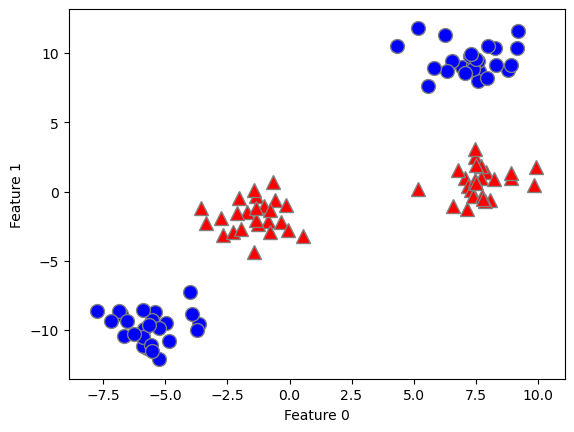

In [2]:
# No need to change anything here
c=['b', 'r', 'g']
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Fit a linear SVM (`LinearSVC` in the scikit-learn) to this dataset. Plot both the data and the resulting decision boundary. You can use the function plot_2d_separator from the plotting_utils.py file by just calling `plot_2d_separator(trained_model, X)`to draw the decision boundary.**

/home/kssrr/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/kssrr/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


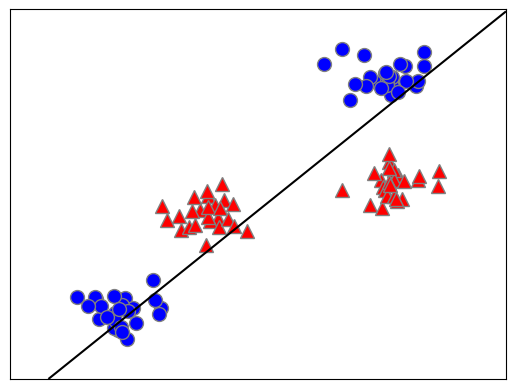

In [7]:
# Code here
svc = LinearSVC()
svc.fit(X, y)

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plot_2d_separator(svc, X)

**Describe what the issue is with the given data.**

The data is not linearly separable, which is why the linear support vector classifier fails to deliver a satisfying result.

### SVM with differente kernels

#### c) What is the idea of the kernel trick? What is an RBF kernel? Give a brief explanation.

Answer here

#### d) Now let's use a kernel SVM to fit the data.

Fit a kernel SVM to the dataset from above. Use an `Radial Basis Function` kernel.
You can use the default `SVC` from scikit-learn. Plot both the dataset the decision boundary of the SVM using the `plot_2d_separator(trained_model, X)`. Try to also visualize the support vectors.

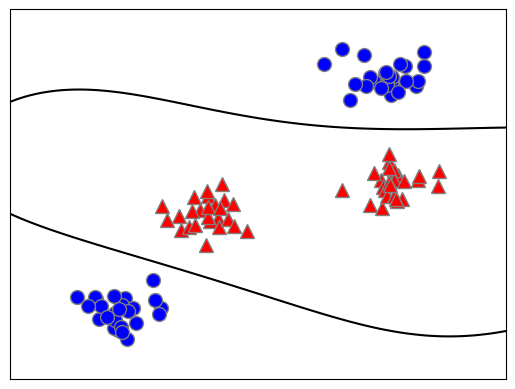

In [11]:
# Code here
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(X, y)

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plot_2d_separator(svc, X)

**What do you observe?**

Using a "kernel trick", we have made the data linearly separable in a higher dimension.

### Exercise 2: Forward Pass in a Multilayer Neural Networks

You are given the following feed-forward neural network containing 2 input neurons, 2 hidden neuron and 1 output neurons:

![network.png](network.png)

w1 to w6 represent the weights of the connections between the neurons. Their exact values can be found in this table:

|Weight|Value|
|-----|------|
|w1|-0.7|
|w2|0.6|
|w3|-0.4|
|w4|0.6|
|w5|-0.3|
|w6|1.0|

Non-input Neuron also have a Bias shown in this table:


|Neuron|Bias|
|-----|-----|
|N3|0.6|
|N4|0.1|
|N5|-1.3|

Assume a sigmoidal activation function $g(x) = 1 / (1+e^{-x})$ in each Neuron.

Calculate the Input and Output of N3, N4 and N5 with input:

|Neuron|Input|
|-----|-----|
|N1|-1.5|
|N2|3.0|

_(Hint: Input Neurons do not use the activation function. The Output of N1 and N2 are therefore the same as their respective Inputs.)_

__For this exercise, you can cut each result at the third digit after the dot. (e.g. 0.12345 becomes 0.123)__


Input N3: $(N_1 \cdot w_1) + (N_2 \cdot w_3) = (-1.5 \cdot -0.7) + (3 \cdot -0.4) = -0.15$

Output N3: $\frac{1}{1+e^{-0.15}} = 0.538$

Input N4: $(N_1 \cdot w_2) + (N_2 \cdot w_4) = (-1.5 \cdot 0.6) + (3 \cdot 0.6) = 0.9$

Output N4: $\frac{1}{1+e^{0.9}} = 0.289$

Input N5: $(N_3 \cdot w_5 + \text{Bias}_{N_3}) + (N_4 \cdot w_6 + \text{Bias}_{N_4}) = (0.538 \cdot -0.3 + 0.6) + (0.9 \cdot 1 + 0.1) = 1.439$

Output N5: $\frac{1}{1+e^{1.439}} = 0.237$

### Exercise 3: Perceptron Implementation

In this exercise, the task is to implement a Perceptron algorithm in Python. Below, we give a bi-dimensional dataset and the class values.



|X    |Y    |Class(OR)|Class(AND)|
|-----|-----|---------|---------|
| 0 | 0 | 0 | 0 |        
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 |
    


##### __(a) In your implementation of a Perceptron, build a Python Class `Perceptron` with the following methods and inputs:__
* Constructor: `__init__(self, learning_rate, number_iterations)`
* Learning funtion: `learn(self, X, y)` where `X` is the training example data as a 2D `numpy.array`and `y`is the training data labels example as a  a 1D `numpy.array`
* Predict function: `predict(self, x)` where `x` is a  1D `numpy.array` with the data that should be classified  
* learning rate

_Your function should print the weights for each iteration and data point._

In [38]:
import numpy as np

class Perceptron():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    # Step function as activation function:
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def learn(self, X, y):
        N, features = X.shape

        self.weights = np.zeros(features)
        self.bias = 0

        y = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.iterations):
            for i, x in enumerate(X):
                linear_output = np.dot(x, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.learning_rate * (y[i] - y_predicted)

                self.weights += update * x
                self.bias += update

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted


##### __(b) Run your Perceptron and set an initial value for the learning rate, the weights (e.g., `<0,0,0>`) and number of iterations. Check the for the OR and AND class the correctness of the classification outputs.__

(Hint: Make sure the learning rate is not too high, otherwise the algorithm will not converge.)

In [39]:
inputs = [
    [0., 0.],
    [1., 0.],
    [0., 1.],
    [1., 1.]
]

X = np.array(inputs)
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])

In [40]:
p = Perceptron(0.01, 5) 

p.learn(X, y_or)
for i, e in zip(inputs, y_or):
    print(f"{i} --> {p.predict(i)}. Excepted {e}")

[0.0, 0.0] --> 0. Excepted 0
[1.0, 0.0] --> 1. Excepted 1
[0.0, 1.0] --> 1. Excepted 1
[1.0, 1.0] --> 1. Excepted 1


##### __(d) When using your perceptron implementation, try to train a model, which classifies the XOR gate `<0,1,1,0>`. Comment on the result and try to explain why it does not work.__

|X    |Y    |Class(XOR)|
|-----|-----|---------|
| 0 | 0 | 0 |       
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [41]:
#Code here
inputs2 = [
    [0., 0.],
    [1., 0.],
    [0., 1.],
    [1., 1.]
]

X_xor = np.array(inputs2)
y_xor = np.array([0, 1, 1, 0])

p2 = Perceptron(0.01, 5)
p2.learn(X_xor, y_or)

[print(f"Predicted: {p}, Expected: {e}") for p, e in zip(p2.predict(inputs2), y_xor)]

Predicted: 0, Expected: 0
Predicted: 1, Expected: 1
Predicted: 1, Expected: 1
Predicted: 1, Expected: 0


[None, None, None, None]

A single percepton cannot solve XOR.